In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense 
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [ ]:
n_pts = 500
centers = [[-1,1], [-1,-1], [1,-1]] #define the three centers of our clusters
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std = 0.4) #cluster_std is the standard deviation from the center of each cluster
#print(X) 
#print(y) # notice that we now have 3 labels 

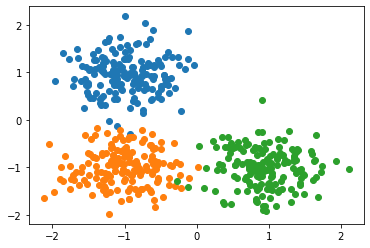

In [ ]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])

In [ ]:
y_cat = to_categorical(y, 3) # (labels, number of clusters) # used to convert the labels to binary to calculate categorical cross entropy
print(y_cat)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [ ]:
model = Sequential()
model.add(Dense(units=3, input_shape=(2,), activation='softmax')) #units: number of clusters
model.compile(Adam(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=X, y=y_cat, verbose=1, batch_size = 50, epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 1ms/step - loss: 1.2019 - accuracy: 0.3858
Epoch 2/100
10/10 [==============================] - 0s 1ms/step - loss: 0.3396 - accuracy: 0.9620
Epoch 3/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1447 - accuracy: 0.9844
Epoch 4/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0981 - accuracy: 0.9893
Epoch 5/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0874 - accuracy: 0.9817
Epoch 6/100
10/10 [==============================] - 0s 745us/step - loss: 0.0685 - accuracy: 0.9855
Epoch 7/100
10/10 [==============================] - 0s 896us/step - loss: 0.0653 - accuracy: 0.9872
Epoch 8/100
10/10 [==============================] - 0s 888us/step - loss: 0.0670 - accuracy: 0.9829
Epoch 9/100
10/10 [==============================] - 0s 896us/step - loss: 0.0586 - accuracy: 0.9844
Epoch 10/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0524 - accuracy: 0.9874
E

In [ ]:
# same from the previous code but y is changed to y_cat in the next line (no actual effect)
# and instead of model.predict we use model.predict_classes
def plot_decision_boundary(X, y_cat, model):
    x_span = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1)
    y_span = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1)
    xx ,yy = np.meshgrid(x_span, y_span)
    # xx will be a 50 * 50 matrix with with repeated raws (50 raws of x_span which has 50 elements)
    # yy will be a 50 * 50 matrics with repeated columns (50 columns of y_span which has 50 elements)
    xx_,yy_ = xx.ravel() , yy.ravel() # convert them to one dimensional
    grid = np.c_[xx_,yy_] # no we have a 50 * 50 grid that spans across our entire data set
    pred_func = model.predict_classes(grid) # feeding to grid to the predict function means that our model will test all the data set points in this grid
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx,yy,z) # it shows contour zones  

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


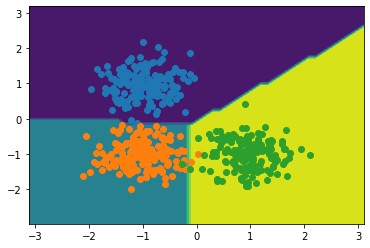

In [ ]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


prediction is:  [0]


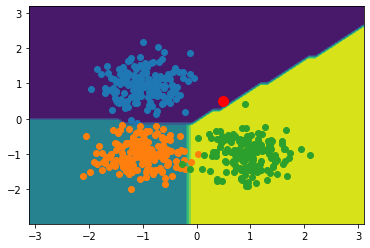

In [ ]:
# now we predict new points
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
x = 0.5
y = 0.5
point = np.array([[x,y]])
prediction = model.predict_classes(point)
plt.plot([x], [y], marker='o', markersize = 10, color='red')
print("prediction is: ", prediction)